# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#365166b18806a88c5636b112e9227e73
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        #print(cities)
# Print the city count to confirm sufficient count
len(cities)


619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# OpenWeatherMap API Key
#api_key = api_keys.api_key
api_key = "365166b18806a88c5636b112e9227e73"
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

for city in cities:
    city_url = url + "&q=" + city
    print(city_url)
    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather['coord']['lat']
        city_mtemp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_cloudiness = city_weather['clouds']['all']
        city_wspeed = city_weather['wind']['speed']
        city_data.append({"city":city,
                      "Latitude":city_lat,
                      "Max Temp":city_mtemp,
                      "Humidity":city_humidity,
                      "Cloudiness":city_cloudiness,
                      "Wind Speed":city_wspeed,
                      })
    except:
        print("city not found")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete  ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=nassau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=sur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=mount gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=nha trang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=ushuaia
http://api.openweathermap.org/data/2.5/weather?un

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=mogadishu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=ghindaresti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=robertsport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=royan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=bud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=svetl

city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=libertador general san martin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=praya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Impe

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=killybegs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=hurghada
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=santiago del estero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=padang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=roma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=ahipara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=plettenberg bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=warqla
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=fort saint john
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=rab
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=polovinnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=bolton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=carhuamayo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=taltal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Impe

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=umzimvubu
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=tromso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=gamboula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=vaitape
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=manzanillo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=bilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=harper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=te anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=apad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=fallon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=gold coast
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=kosh-agach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=bandar-e torkaman
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=houston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=neftcala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=hornepayne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=dzhusaly
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=yerbogachen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=kapit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=toliary
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=ahumada
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=karaton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=feijo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=nuevo progreso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=elverum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=kharovsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=ohara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=sobolevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=goderich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=palmares do sul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b18806a88c5636b112e9227e73&q=umm durman
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=365166b188

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#creating a dataframe
city_df = pd.DataFrame(city_data)

# re arranging the columns in data frame 
city_df = city_df [["city","Cloudiness","Humidity","Latitude","Max Temp","Wind Speed"]]
city_df.head()

,city,Cloudiness,Humidity,Latitude,Max Temp,Wind Speed
0,nassau,0,62,51.17,57.00,4.70
1,tasiilaq,75,91,65.61,32.00,28.86
2,mataura,0,73,-46.19,24.17,2.93
3,bethel,40,73,60.79,26.60,12.75
4,sur,8,82,22.57,80.60,1.48


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

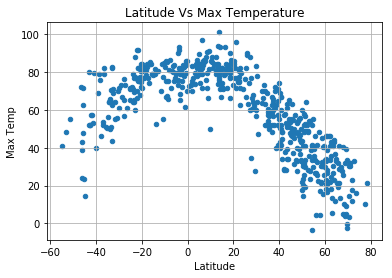

In [9]:

## Latitude Vs Max Temperature plot
#plt.scatter(city_df['Latitude'],city_df['Max Temp'],)
city_df.plot(x = 'Latitude',y = 'Max Temp',kind ='scatter',title="Latitude Vs Max Temperature",grid = True)

# save the figure 
plt.savefig("Max_Temp_vs_Latitude.png")

# Display the plot 
plt.show()

#### Latitude vs. Humidity Plot

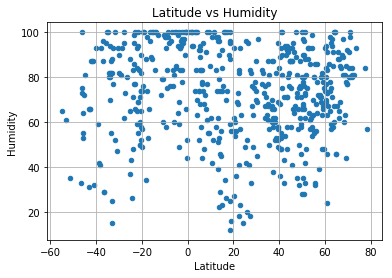

In [10]:

## latitude vs Humidity
city_df.plot(x='Latitude',y='Humidity',kind = 'scatter',title ="Latitude vs Humidity",grid = True)
# save the figure 
plt.savefig("Humidity_vs_Latitude.png")
# Display the plot 
plt.show()

#### Latitude vs. Cloudiness Plot

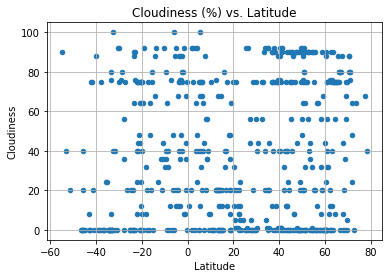

In [11]:
# Cloudiness (%) vs. Latitude
city_df.plot(x='Latitude',y='Cloudiness',kind = 'scatter',title ="Cloudiness (%) vs. Latitude",grid = True)

# save the figure 
plt.savefig("Cloudiness_vs_Latitude.png")

# Display the plot 
plt.show()

#### Latitude vs. Wind Speed Plot

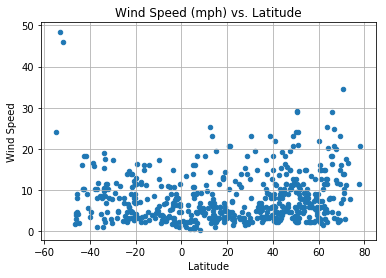

In [12]:
# Wind Speed (mph) vs. Latitude
city_df.plot(x='Latitude',y='Wind Speed',kind = 'scatter',title ="Wind Speed (mph) vs. Latitude",grid = True) 

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

In [13]:
# save the Dataframe to csv file 
city_df.to_csv("output_data_file.csv",index_label ="city_id")

In [14]:
print("Data Analysis & Charts reflect")

Data Analysis & Charts reflect
